In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score


In [71]:
train_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")


In [72]:
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [73]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [74]:
train_data[list(train_data.columns)[10:]].head()


,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,19,nov,44,2,-1,0,unknown,no
1,20,jul,91,2,-1,0,unknown,no
2,18,jul,240,1,-1,0,unknown,no
3,22,jun,867,1,84,3,success,yes
4,4,feb,380,1,-1,0,unknown,no


In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [76]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [77]:
print('Number of columns:',len(train_data.columns))

Number of columns: 18


In [78]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


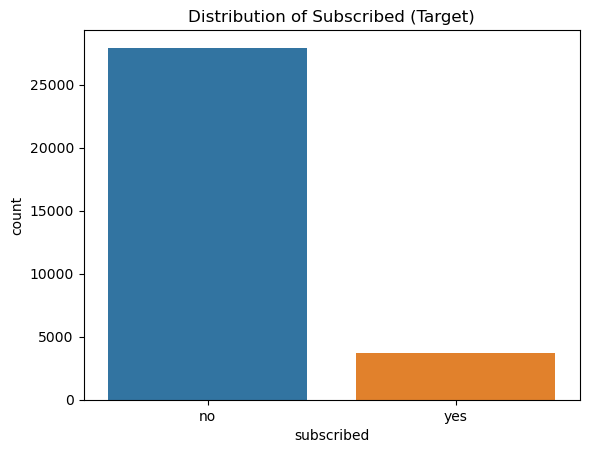

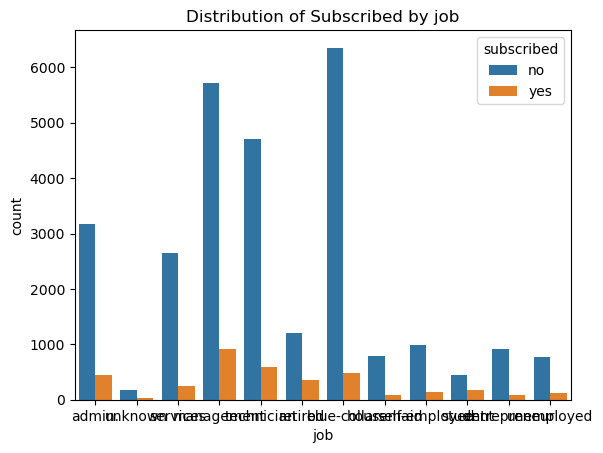

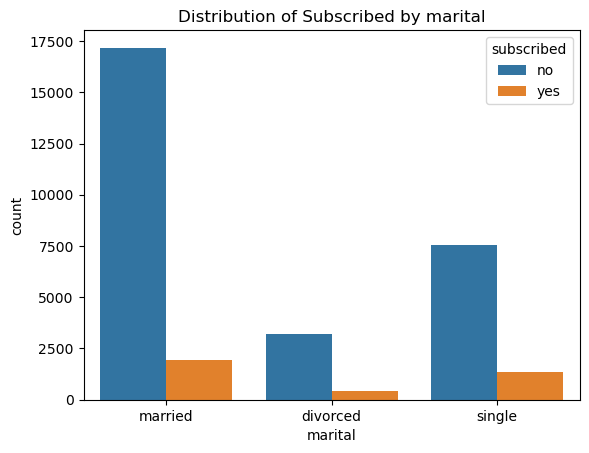

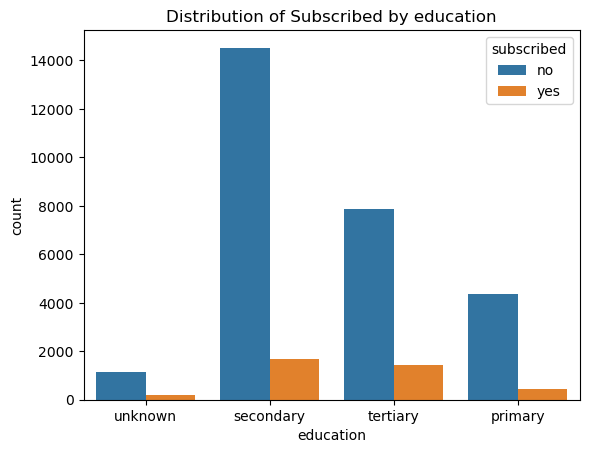

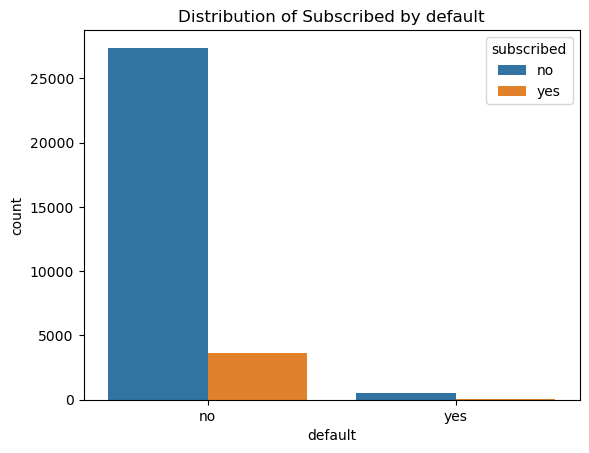

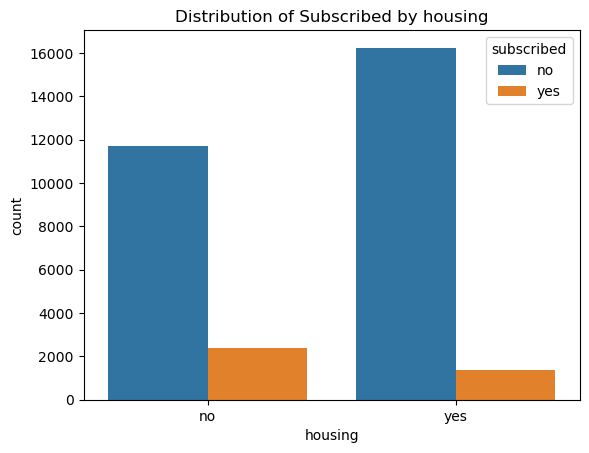

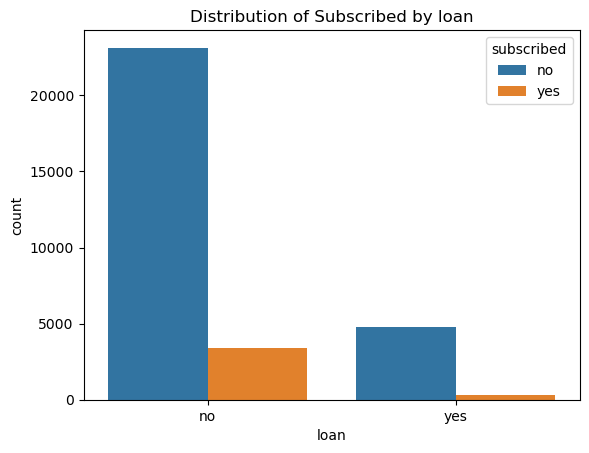

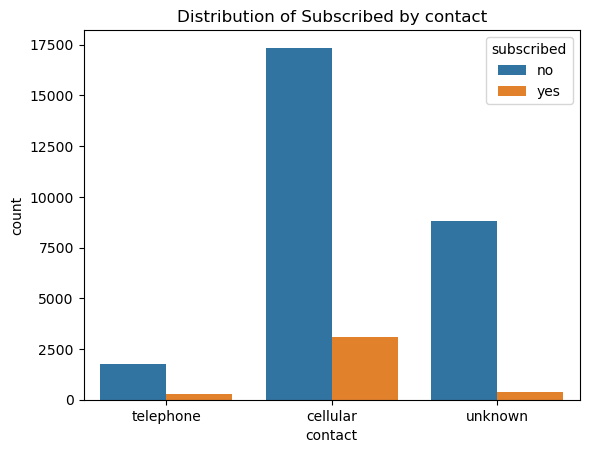

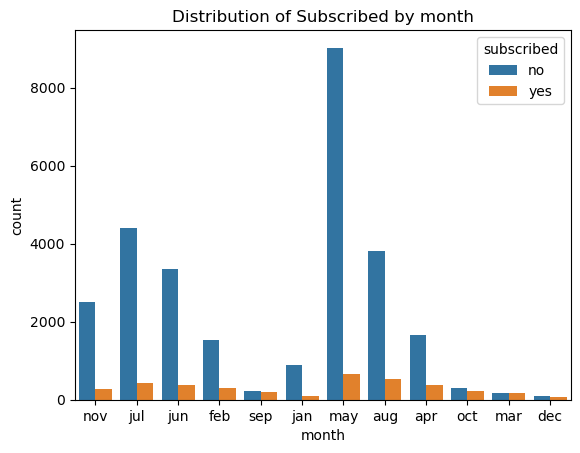

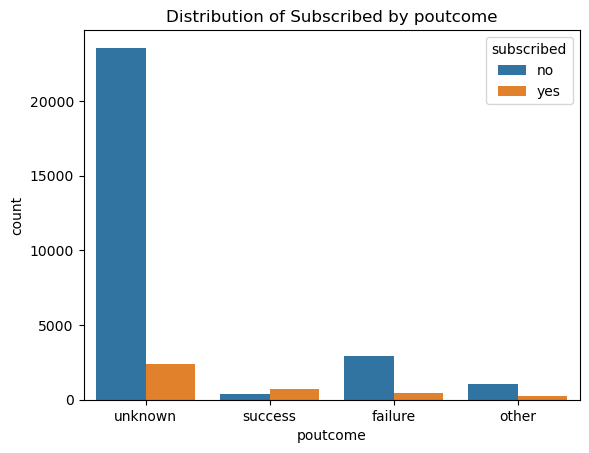

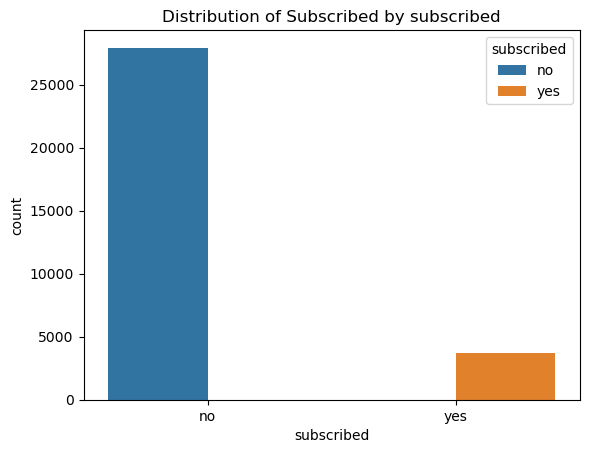

In [79]:
sns.countplot(x='subscribed', data=train_data)
plt.title('Distribution of Subscribed (Target)')
plt.show()


categorical_columns = train_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=column, hue='subscribed', data=train_data)
    plt.title(f'Distribution of Subscribed by {column}')
    plt.show()

<Figure size 4000x2500 with 0 Axes>

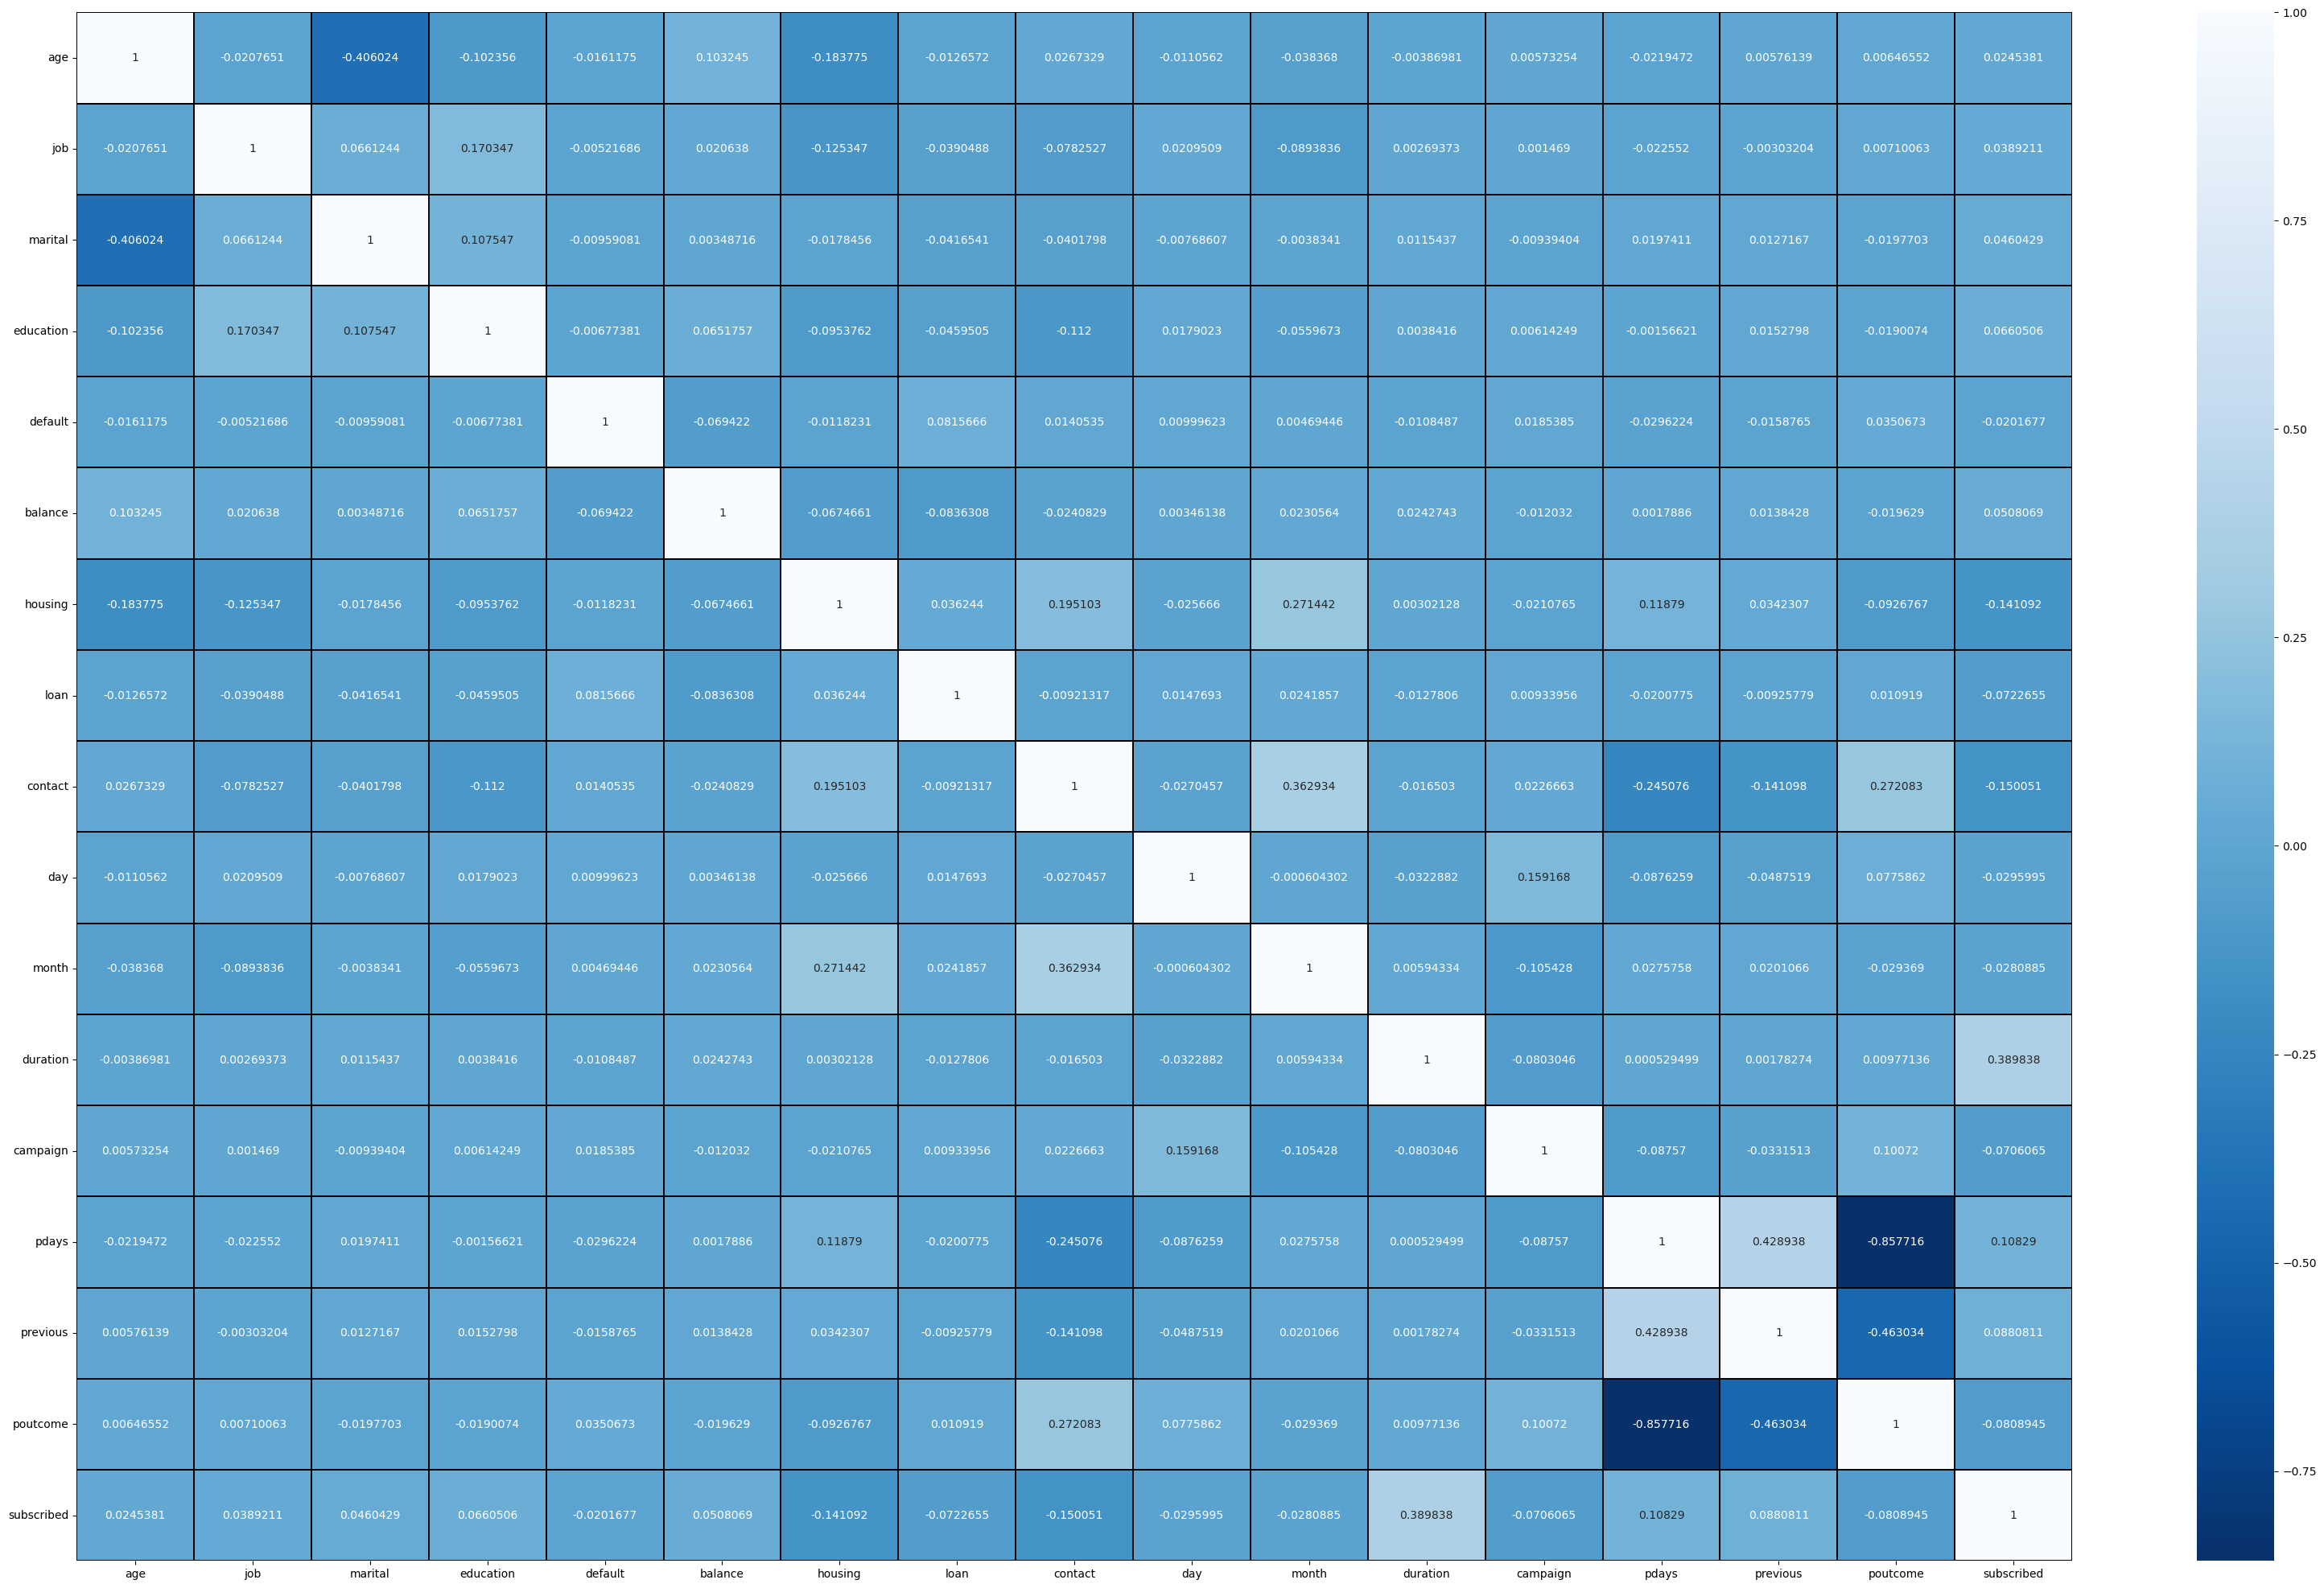

In [91]:
plt.figure(figsize=(40,25))
plt.figure(figsize=(40,25))
sns.heatmap(train_data.corr(),linewidths= 0.1, fmt="1g",linecolor="Black",annot=True, cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [81]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

X = train_data.drop(columns=['subscribed'])
y = train_data['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
TweedieRegressor(alpha=0.5, link='log', power=1)
reg.coef_



array([0.24631611, 0.43370317])

In [84]:
reg.intercept_

-0.7638091359123443

In [106]:

train_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train_data

test_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv"
test_data = pd.read_csv(test_url)

train_data = train_data.drop(columns=['ID'])
test_data = test_data.drop(columns=['ID'])

label_encoder = LabelEncoder()
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    
    if '<unknown>' not in label_encoder.classes_:
        label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
    
    test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
    test_data[column] = label_encoder.transform(test_data[column])


X_train = train_data.drop(columns=['subscribed'])
y_train = train_data['subscribed']


X_test = test_data


model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred = model.predict(X_test)


predictions_df = pd.DataFrame({'ID': test_data.index, 'subscribed': y_pred})
print(predictions_df)

          ID  subscribed
0          0           0
1          1           0
2          2           0
3          3           0
4          4           0
...      ...         ...
13559  13559           0
13560  13560           0
13561  13561           0
13562  13562           0
13563  13563           0

[13564 rows x 2 columns]
